# Installing Hadoop 3.2.1 Single node cluster on Windows 10

### 1. Prerequisites
First, we need to make sure that the following prerequisites are installed:
1. Java 8 runtime environment (JRE): Hadoop 3 requires a Java 8 installation.
2. Java 8 development Kit (JDK)
3. To unzip downloaded Hadoop binaries, we should install 7zip.

### 2. Download Hadoop binaries
The first step is to download Hadoop binaries from this given link [here](https://www.apache.org/dyn/closer.cgi/hadoop/common/hadoop-3.2.1/hadoop-3.2.1.tar.gz). The binary package size is about 342 MB. 

This hadoop version is **3.2.1**. We cannot use the latest version because there is no `winutils` software built for the latest hadoop version yet.


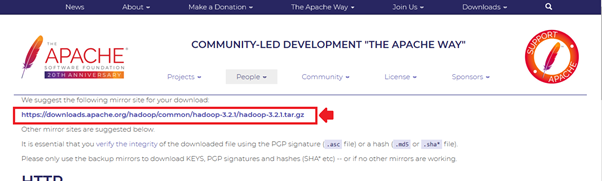<br>
Figure 1 — Hadoop binaries download link

After finishing the file download, we should unpack the package using `7zip` into two steps. First, we should extract the `hadoop-3.2.1.tar.gz` library, and then, we should unpack the extracted `tar` file (unpack the inner `tar` file to the **location where hadoop is to be "installed"**):

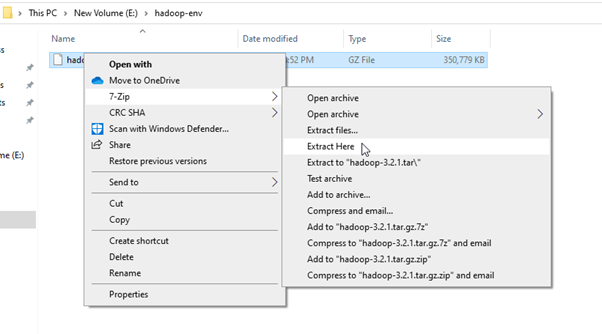<br>
Figure 2 — Extracting hadoop-3.2.1.tar.gz package using 7zip

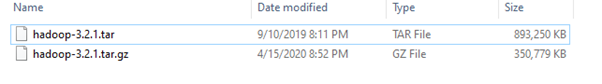<br>
Figure 3 — Extracted hadoop-3.2.1.tar file

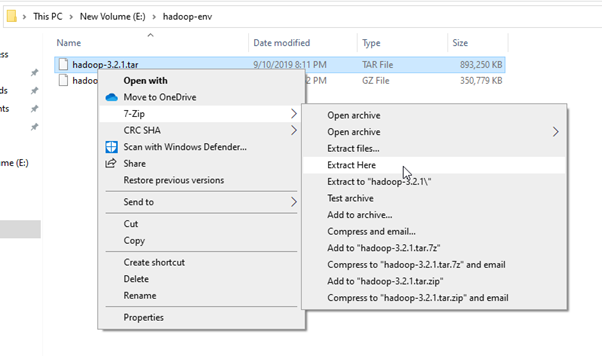<br>
Figure 4 — Extracting the hadoop-3.2.1.tar file

The `tar` file extraction may take some minutes to finish. In the end, you may see some warnings about symbolic link creation. Just ignore these warnings since they are not related to windows.

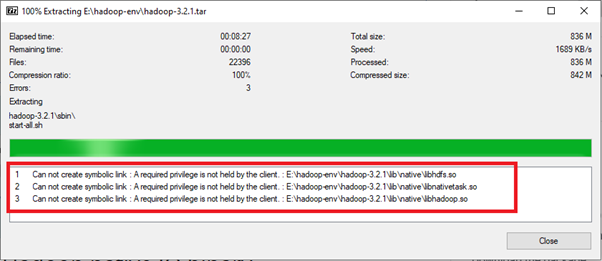

Figure 5 — Symbolic link warnings

After unpacking the package, we should add the Hadoop native IO libraries, which can be found in the following GitHub repository: https://github.com/cdarlint/winutils.  

Since we are installing **Hadoop 3.2.1**, we should download the files located in https://github.com/cdarlint/winutils/tree/master/hadoop-3.2.1/bin and copy them into the `hadoop-3.2.1\bin` directory.


### 3. Setting up environment variables

After installing Hadoop and its prerequisites, we should configure the environment variables to define **Hadoop and Java default paths**.

To edit environment variables, go to **Control Panel > System and Security > System (or right-click > properties on My Computer icon)** and click on the **Advanced system settings** link.


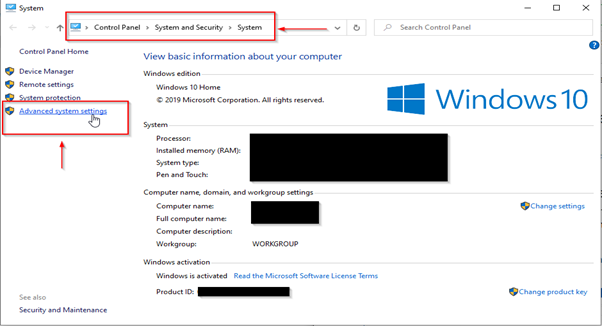<br>
Figure 6 — Opening advanced system settings

When the **Advanced system settings** dialog appears, go to the **Advanced** tab and click on the **Environment variables** button located on the bottom of the dialog.

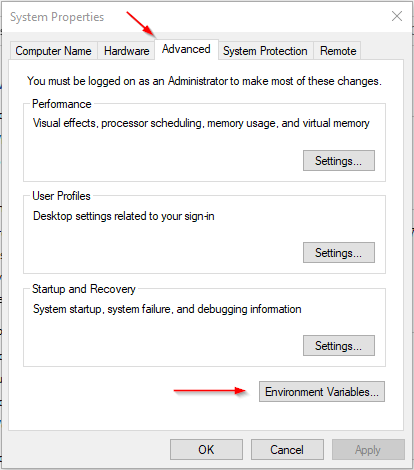<br>
Figure 7 — Advanced system settings dialog

In the **Environment Variables** dialog, press the **New** button to add a new variable.

**Note:** In this guide, we will add the variable to the **User variables** section since we are configuring Hadoop for a single user. If you are looking to configure Hadoop for multiple users, you can define the variables in the System variables section instead.
There are two variables to define:
1. **JAVA_HOME** - JDK installation folder path
2. **HADOOP_HOME** - Hadoop installation folder path


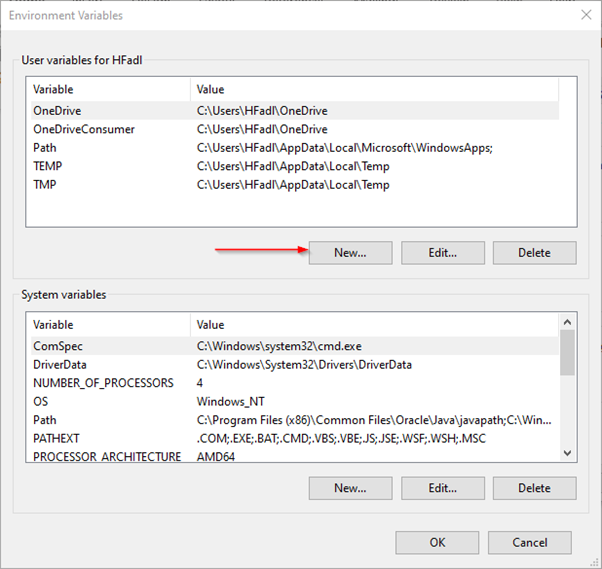<br>
Figure 8 — Adding **JAVA_HOME** variable

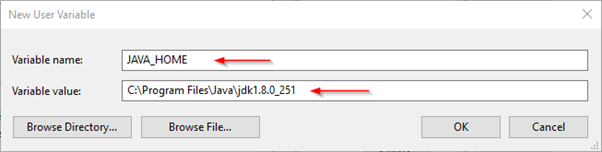<br>
Figure 9 — Adding **HADOOP_HOME** variable

Now, we should edit the PATH variable to add the Java and Hadoop binaries paths as shown in the following screenshots

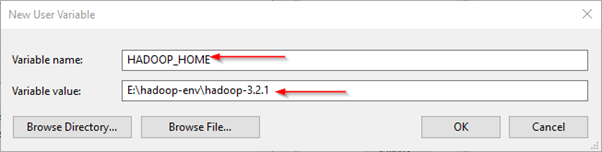

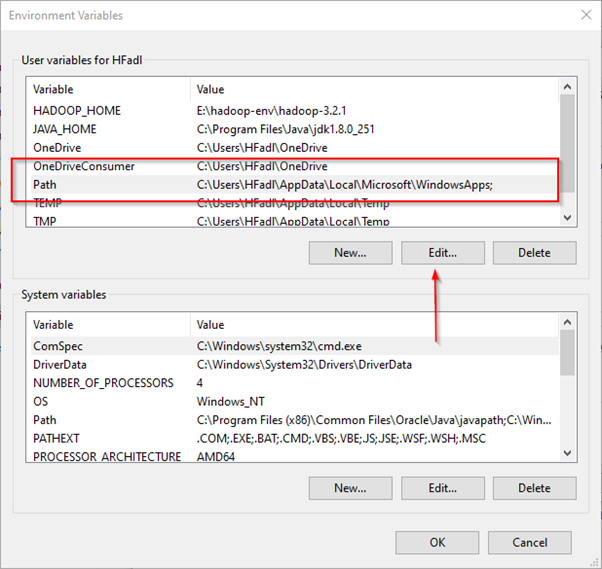<br>
Figure 11 — Editing PATH variable

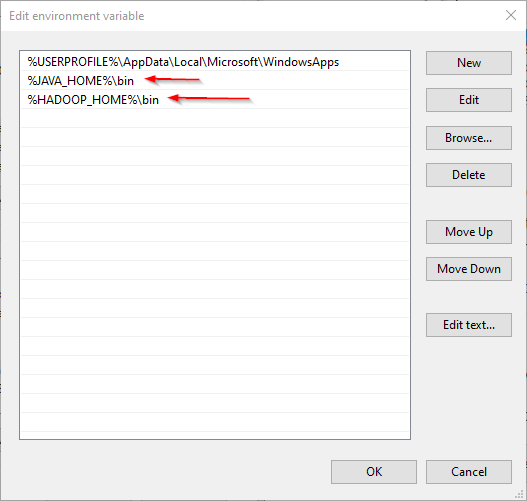<br>
Figure 12— Adding new paths to the PATH variable

### 4. Configuring Hadoop cluster
There are four files that we need to alter to configure Hadoop cluster:

```
1. %HADOOP_HOME%\etc\hadoop\hdfs-site.xml
2. %HADOOP_HOME%\etc\hadoop\core-site.xml
3. %HADOOP_HOME%\etc\hadoop\mapred-site.xml
4. %HADOOP_HOME%\etc\hadoop\yarn-site.xml
```

#### 4.1. HDFS site configuration  

As we know, Hadoop is built using a master-slave paradigm. Before altering the HDFS configuration file, we should create a directory to store all master node (name node) data and another one to store data (data node). In this example, we created the following directories:

- `E:\hadoop-env\hadoop-3.2.1\data\dfs\namenode`
- `E:\hadoop-env\hadoop-3.2.1\data\dfs\datanode`

If you don't have an `E:\` drive, the folders can be created in another location but make sure you remember where you created it as we will be needing this information later.

Now, let’s open `hdfs-site.xml` file located in `%HADOOP_HOME%\etc\hadoop` directory, and we should add the following properties within the `<configuration></configuration>` element:

**Note:** If your `namenode` and `datanode` folders are different, make sure you replace them in the `<value>` fields correctly.

```
<property>
  <name>dfs.replication</name>
  <value>1</value>
</property>

<property>
  <name>dfs.namenode.name.dir</name>
  <value>file:///E:/hadoop-env/hadoop-3.2.1/data/dfs/namenode</value>
</property>
  
<property>
  <name>dfs.datanode.data.dir</name>
  <value>file:///E:/hadoop-env/hadoop-3.2.1/data/dfs/datanode</value>
</property>
```

Note that we have set the replication factor to 1 since we are creating a single node cluster.

#### 4.2. Core site configuration


Now, we should configure the name node URL adding the following XML code into the `<configuration></configuration>` element within `core-site.xml`:

```
<property>
  <name>fs.default.name</name>
  <value>hdfs://localhost:9820</value>
</property>
```

#### 4.3. Map Reduce site configuration


Now, we should add the following XML code into the `<configuration></configuration>` element within `mapred-site.xml`:

```
<property>
  <name>mapreduce.framework.name</name>
  <value>yarn</value>
  <description>MapReduce framework name</description>
</property>
```

#### 4.4. Yarn site configuration


Now, we should add the following XML code into the `<configuration></configuration>` element within `yarn-site.xml`:

```
<property>
  <name>yarn.nodemanager.aux-services</name>
  <value>mapreduce_shuffle</value>
  <description>Yarn Node Manager Aux Service</description>
</property>
```

### 5. Formatting Name node
After finishing the configuration, let’s try to format the name node using the following command:


In [ ]:
hdfs namenode -format

Due to a bug in the Hadoop 3.2.1 release, you will receive the following error:

```
2020–04–17 22:04:01,503 ERROR namenode.NameNode: Failed to start namenode.
java.lang.UnsupportedOperationException
    at java.nio.file.Files.setPosixFilePermissions(Files.java:2044)
    at org.apache.hadoop.hdfs.server.common.Storage$StorageDirectory.clearDirectory(Storage.java:452)
    at org.apache.hadoop.hdfs.server.namenode.NNStorage.format(NNStorage.java:591)
    at org.apache.hadoop.hdfs.server.namenode.NNStorage.format(NNStorage.java:613)
    at org.apache.hadoop.hdfs.server.namenode.FSImage.format(FSImage.java:188)
    at org.apache.hadoop.hdfs.server.namenode.NameNode.format(NameNode.java:1206)
    at org.apache.hadoop.hdfs.server.namenode.NameNode.createNameNode(NameNode.java:1649)
    at org.apache.hadoop.hdfs.server.namenode.NameNode.main(NameNode.java:1759)

2020–04–17 22:04:01,511 INFO util.ExitUtil: Exiting with status 1: java.lang.UnsupportedOperationException
2020–04–17 22:04:01,518 INFO namenode.NameNode: SHUTDOWN_MSG:
```

This issue will be solved within the next release. For now, you can fix it temporarily using the following steps :

1. Download `hadoop-hdfs-3.2.1.jar` file from the following [link](https://kontext.tech/column/hadoop/379/fix-for-hadoop-321-namenode-format-issue-on-windows-10).

2. Navigate to the `%HADOOP_HOME%\share\hadoop\hdfs` folder and rename the file `hadoop-hdfs-3.2.1.jar` to `hadoop-hdfs-3.2.1.jar.bak`. This is the existing file within that folder.

3. Copy the downloaded `hadoop-hdfs-3.2.1.jar` to the folder `%HADOOP_HOME%\share\hadoop\hdfs`

Now, if we try to re-execute the format command (Run the command prompt or PowerShell as administrator), you need to approve file system format (aka enter `y` when it asks `Re-format filesystem in Storage Directory root=...`.

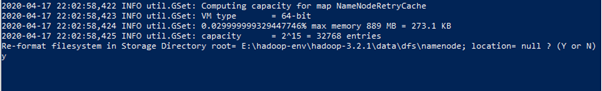

And the command is executed successfully:

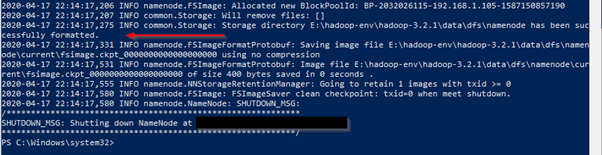

### 6. Starting Hadoop services
Now, we will open **PowerShell with Run as Administrator**, and navigate to `%HADOOP_HOME%\sbin` directory. Then we will run the following command to start the Hadoop nodes:

In [ ]:
.\start-dfs.cmd

**Note**: Make sure **all** the 4 Apache Hadoop Distribution windows are up and running. If they are not running, you will see **an error or a shutdown message**. In that case, please call the instructor for help.

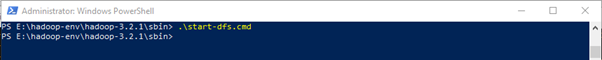

Two command prompt windows will open (one for the name node and one for the data node) as follows:

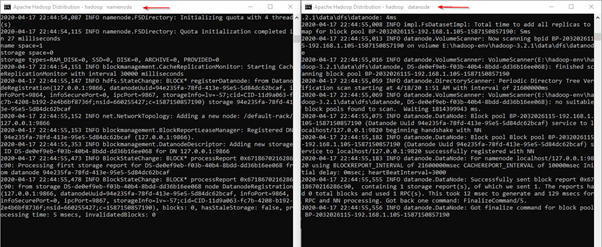

Next, we must start the Hadoop Yarn service using the following command:

In [ ]:
.\start-yarn.cmd

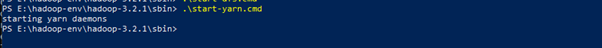

Two command prompt windows will open (one for the resource manager and one for the node manager) as follows:

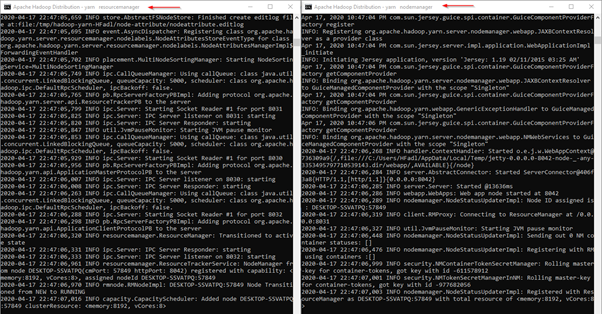

To make sure that all services started successfully, we can run the following command:

In [ ]:
jps

It should display the following services (the numbers will differ between different machines):

In [ ]:
14560 DataNode
4960 ResourceManager
5936 NameNode
768 NodeManager
14636 Jps

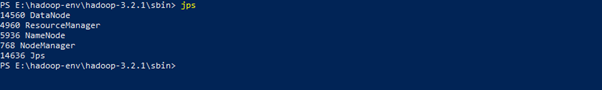

### 7. Hadoop Web UI
There are three web user interfaces to be used:
- Name node web page: http://localhost:9870/dfshealth.html
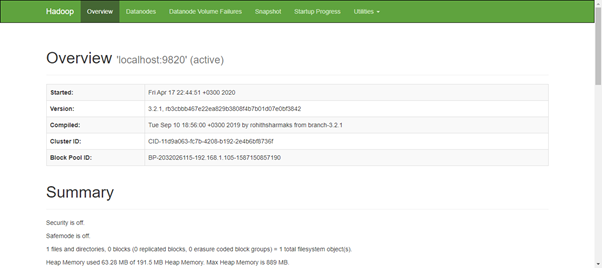

- Data node web page: http://localhost:9864/datanode.html

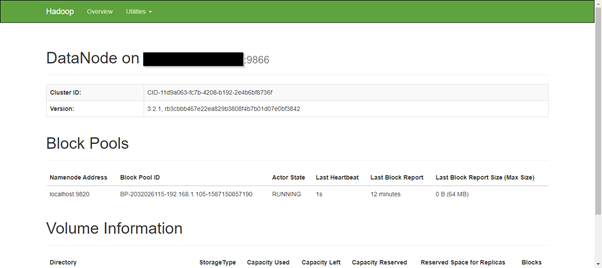

- Yarn web page: http://localhost:8088/cluster

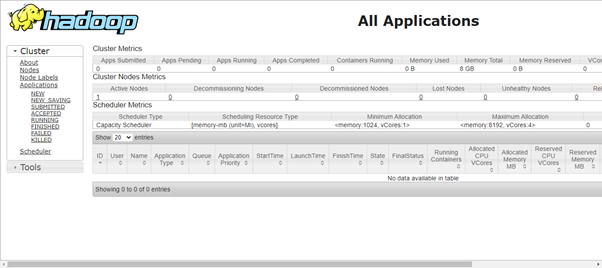

### 8. Stopping Hadoop

Once you are finished with the Hadoop Services, use the commands to stop it.<br>
They are to be executed in terminal or Powershell in the directory `%HADOOP_HOME%\sbin`.

```
.\stop-yarn.cmd
.\stop-dfs.cmd
```

Link: https://medium.com/analytics-vidhya/hadoop-setting-up-a-single-node-cluster-in-windows-4221aab69aa6   